In [1]:
#for data processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from geopy.geocoders import Nominatim

#for model training 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#for vizualizing graphs
import matplotlib.pyplot as plt

In [15]:
#read dataset csv and display first rows
data = pd.read_csv('degree_dataset.csv')
data.head()

,Name,A/L_Subjects,Your_choise,Parent_Income,District,City,Degree_University,University_City
0,Vamsi_Viswanadha,Maths,Computing,100000,Colombo,Malabe,Software Engineering - Sri Lanka Institute of ...,malabe
1,indu1234,Science,Computing,200000,Matara,Matara,Software Engineering - Informatics Institute o...,wellawatta
2,daqo,Arts,Computing,150000,Colombo,Rathmalana,Computer Science - General Sir John Kotelawala...,rathmalana
3,kuchhal.dk,Maths,Engineering,90000,Colombo,Kaduwela,Mechanical Engineering - Sri Lanka Institute o...,malabe
4,navyatha,Maths,Engineering,175000,Galle,Galle,Civil Engineering - General Sir John Kotelawal...,rathmalana


In [16]:
#Lattitude and longitude is taken for cities given
data['City_lat'] = data['City']
data['City_long'] = data['City']
cities = np.sort(data['City'].dropna().unique())
locator = Nominatim(user_agent="myGeocoder",timeout=None)
#maximum lattitude and longitude when normalizing data will be devided by these
max_lat = 9.81667
max_lon = 81.84198

In [4]:
#coordinated of the cities are searched using geocode
locs = []
lats = {}
longs = {}
for city in cities:
  print(city)
  t = locator.geocode(city+', Sri Lanka')[-1]
  lats[city] = t[0]
  longs[city] = t[1]
  locs.append(t)

Aluthgama
Ambalangoda
Ampara
Angoda
Anuradhapura
Avissawella
Badulla
Bambalapitiya
Bandarawela
Battaramulla
Batticaloa
Beruwala
Dambagalla
Dambulla
Dehiwala
Dikwella
Elahera
Galle
Hambantota
Hanwella
Hikkaduwa
Hingurakgoda
Hokandara
Homagama
Horana
Jaffna
Kadawatha
Kaduwela
Kalutara
Kandy
Katugastota
Katukurunda
Kelaniya
Kilinochchi
Kiribathgoda
Kollupitiya
Kolonnawa
Kosgama
Koswatta
Kotikawatta
Kottawa
Kotte
Kuliyapitiya
Kurunagala
Maharagama
Malabe
Mannar
Matale
Matara
Minneriya
Monaragala
Moratuwa
Mullaitivu
Narangala
Negombo
Nittambuwa
Nuwara Eliya
Padukka
Panadura
Pannipitiya
Pelmadulla
Peradeniya
Pilimathalawa
Piliyandala
Polgasowita
Puttalam
Rajagiriya
Rathmalana
Ratnapura
Thalahena
Thalawathugoda
Trincomalee
Vavuniya
Wadduwa
Wattala
Weligama
Wellawatta
Wennappuwa


In [17]:
#latitude and longitude of cities added to the dataset
data['City_lat'] = data['City_lat'].replace(lats)
data['City_long'] = data['City_long'].replace(longs)
data.head()

,Name,A/L_Subjects,Your_choise,Parent_Income,District,City,Degree_University,University_City,City_lat,City_long
0,Vamsi_Viswanadha,Maths,Computing,100000,Colombo,Malabe,Software Engineering - Sri Lanka Institute of ...,malabe,6.904072,79.954619
1,indu1234,Science,Computing,200000,Matara,Matara,Software Engineering - Informatics Institute o...,wellawatta,5.947822,80.548292
2,daqo,Arts,Computing,150000,Colombo,Rathmalana,Computer Science - General Sir John Kotelawala...,rathmalana,6.819746,79.868264
3,kuchhal.dk,Maths,Engineering,90000,Colombo,Kaduwela,Mechanical Engineering - Sri Lanka Institute o...,malabe,6.935703,79.984331
4,navyatha,Maths,Engineering,175000,Galle,Galle,Civil Engineering - General Sir John Kotelawal...,rathmalana,6.032814,80.214955


In [18]:
#coordinated of the Districts are searched using geocode
data['District_lat'] = data['District']
data['District_long'] = data['District']
dis_lat = {}
dis_long = {}
for district in data['District'].unique():
  t = locator.geocode(district+', Sri Lanka')[-1]
  dis_lat[district] = t[0]
  dis_long[district] = t[1]
  locs.append(t)

In [19]:
#latitude and longitude of cities added to the dataset
data['District_lat'] = data['District_lat'].replace(dis_lat)
data['District_long'] = data['District_long'].replace(dis_long)
data.head()

,Name,A/L_Subjects,Your_choise,Parent_Income,District,City,Degree_University,University_City,City_lat,City_long,District_lat,District_long
0,Vamsi_Viswanadha,Maths,Computing,100000,Colombo,Malabe,Software Engineering - Sri Lanka Institute of ...,malabe,6.904072,79.954619,6.938747,79.854113
1,indu1234,Science,Computing,200000,Matara,Matara,Software Engineering - Informatics Institute o...,wellawatta,5.947822,80.548292,5.947822,80.548292
2,daqo,Arts,Computing,150000,Colombo,Rathmalana,Computer Science - General Sir John Kotelawala...,rathmalana,6.819746,79.868264,6.938747,79.854113
3,kuchhal.dk,Maths,Engineering,90000,Colombo,Kaduwela,Mechanical Engineering - Sri Lanka Institute o...,malabe,6.935703,79.984331,6.938747,79.854113
4,navyatha,Maths,Engineering,175000,Galle,Galle,Civil Engineering - General Sir John Kotelawal...,rathmalana,6.032814,80.214955,6.032814,80.214955


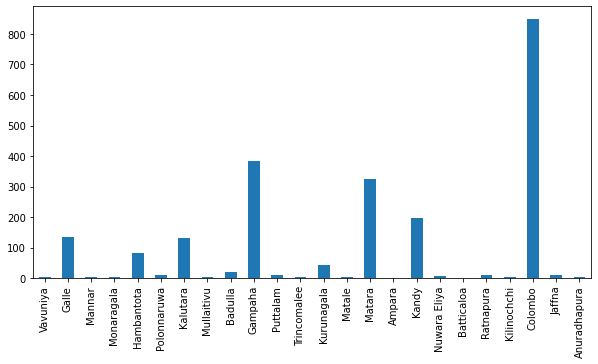

In [8]:
#Data distribution related to districts
plt.figure(1, figsize=(10,5))
data['District'].value_counts(sort=False).plot(kind='bar')

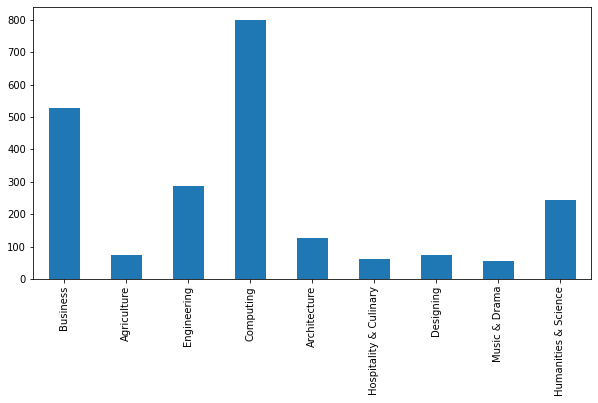

In [9]:
#Data distribution related to user's choise
plt.figure(1, figsize=(10,5))
data['Your_choise'].value_counts(sort=False).plot(kind='bar')

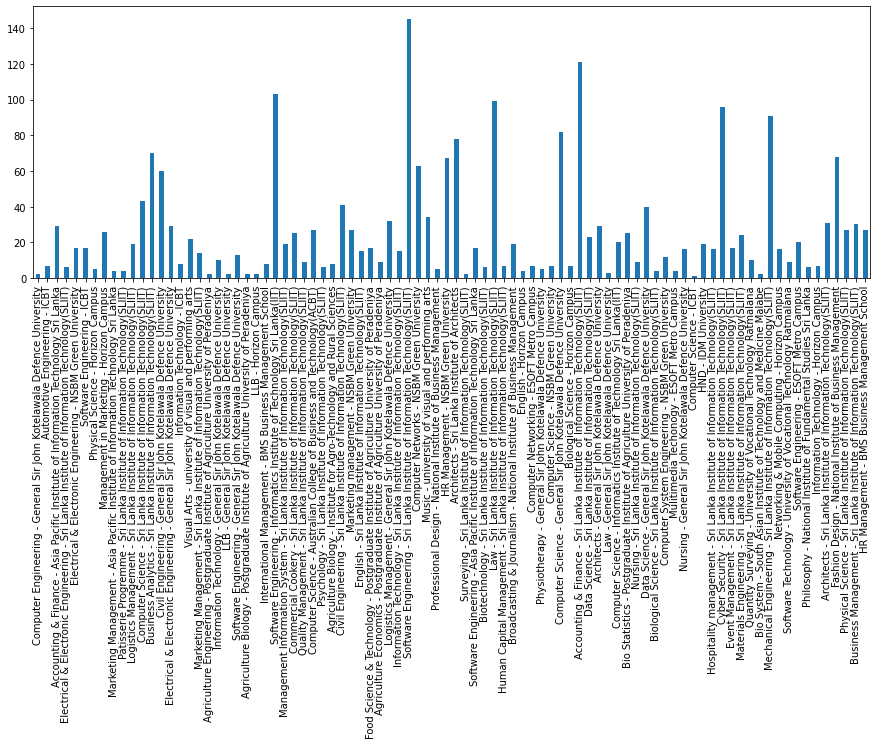

In [10]:
#Data distribution related to selected degrees and universities
plt.figure(1, figsize=(15,5))
data['Degree_University'].value_counts(sort=False).plot(kind='bar')

In [20]:
#strip for whitespaces. Parent income is a numerical column thus strip not necessary
for i in data.drop(['Parent_Income','City_lat','City_long','District_lat','District_long'],axis=1).columns:
    data[i] = data[i].str.strip()

In [21]:
#Name and University city columns are not used so they are dropped from dataset
#rows with empty values is removed
data = data.drop(['Name','University_City','City'],axis=1).dropna()
data.reset_index(drop=True, inplace=True)

In [22]:
#data that needs to be encoded separated as encoding data
#Numerical columns do not need encoding
encoding_data = data.drop(['Parent_Income','City_lat','City_long','District_lat','District_long'],axis=1)
for i in encoding_data.columns:
  print(len(encoding_data[i].unique()),np.sort(encoding_data[i].unique()).tolist())


5 ['Arts', 'Commerce', 'Maths', 'Science', 'Technology']
9 ['Agriculture', 'Architecture', 'Business', 'Computing', 'Designing', 'Engineering', 'Hospitality & Culinary', 'Humanities & Science', 'Music & Drama']
24 ['Ampara', 'Anuradhapura', 'Badulla', 'Batticaloa', 'Colombo', 'Galle', 'Gampaha', 'Hambantota', 'Jaffna', 'Kalutara', 'Kandy', 'Kilinochchi', 'Kurunagala', 'Mannar', 'Matale', 'Matara', 'Monaragala', 'Mullaitivu', 'Nuwara Eliya', 'Polonnaruwa', 'Puttalam', 'Ratnapura', 'Trincomalee', 'Vavuniya']
88 ['Accounting & Finance - Asia Pacific Institute of Information Technology Sri Lanka', 'Accounting & Finance - Sri Lanka Institute of Information Technology(SLIIT)', 'Agriculture Biology - Institute for Agro-Technology and Rural Sciences', 'Agriculture Biology - Postgraduate Institute of Agriculture University of Peradeniya', 'Agriculture Economics - Postgraduate Institute of Agriculture University of Peradeniya', 'Agriculture Engineering - Postgraduate Institute of Agriculture Uni

In [23]:
#Categorical data cannot be used as it is when training they need to be encoded. 
#One-hot encoding is used here.
#Setting up encoders are done here. If this encounters unknown values afterwards they are encoded as 0
encoding_columns = encoding_data.columns 
unique_values = [np.sort(encoding_data[i].unique()) for i in encoding_columns]

encoders = [OneHotEncoder(handle_unknown='ignore') for i in range(4)]

for i,encoder in enumerate(encoders):
    encoder.fit(np.array(unique_values[i]).reshape((-1,1)))

In [24]:
#Parent income contains larger values using it as it is will affect model accuracy negatively.
#Thus it is normalized between 0 and 1
max_income = data['Parent_Income'].max()
income_normalized = data['Parent_Income']/max_income
income_normalized = pd.DataFrame(income_normalized,columns=['Parent_Income'])

city_lat = data['City_lat'] - data['District_lat']
city_long = data['City_long'] - data['District_long']
district_lat = data['District_lat']/ max_lat
district_long = data['District_long']/ max_lon


In [25]:
#New dataset is generated using normalized income and encoded categorical columns
#Degree and University column is not in this dataset as it is used as labels, it is encoded in below cell
dataframes = [income_normalized,city_lat.abs(),city_long.abs(),district_lat,district_long]
for i in range(3):
  encoded = encoders[i].transform(np.array(encoding_data[encoding_columns[i]]).reshape((-1,1))).toarray()
  dataframes.append(pd.DataFrame(encoded,columns=[encoding_columns[i]+j for j in unique_values[i]]))
dataset = pd.concat(dataframes,axis=1)

dataset.head()

,Parent_Income,0,1,District_lat,District_long,A/L_SubjectsArts,A/L_SubjectsCommerce,A/L_SubjectsMaths,A/L_SubjectsScience,A/L_SubjectsTechnology,Your_choiseAgriculture,Your_choiseArchitecture,Your_choiseBusiness,Your_choiseComputing,Your_choiseDesigning,Your_choiseEngineering,Your_choiseHospitality & Culinary,Your_choiseHumanities & Science,Your_choiseMusic & Drama,DistrictAmpara,DistrictAnuradhapura,DistrictBadulla,DistrictBatticaloa,DistrictColombo,DistrictGalle,DistrictGampaha,DistrictHambantota,DistrictJaffna,DistrictKalutara,DistrictKandy,DistrictKilinochchi,DistrictKurunagala,DistrictMannar,DistrictMatale,DistrictMatara,DistrictMonaragala,DistrictMullaitivu,DistrictNuwara Eliya,DistrictPolonnaruwa,DistrictPuttalam,DistrictRatnapura,DistrictTrincomalee,DistrictVavuniya
0,0.285714,0.034675,0.100505,0.706833,0.975711,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.571429,0.000000,0.000000,0.605890,0.984193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.428571,0.119001,0.014151,0.706833,0.975711,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.257143,0.003044,0.130218,0.706833,0.975711,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,0.000000,0.000000,0.614548,0.980120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# One-hot encoding labels
labels = encoding_data['Degree_University']
encoded = encoders[3].transform(np.array(labels).reshape((-1,1))).toarray()
labels = pd.DataFrame(encoded,columns=[j for j in unique_values[3]])
labels.head()

,Accounting & Finance - Asia Pacific Institute of Information Technology Sri Lanka,Accounting & Finance - Sri Lanka Institute of Information Technology(SLIIT),Agriculture Biology - Institute for Agro-Technology and Rural Sciences,Agriculture Biology - Postgraduate Institute of Agriculture University of Peradeniya,Agriculture Economics - Postgraduate Institute of Agriculture University of Peradeniya,Agriculture Engineering - Postgraduate Institute of Agriculture University of Peradeniya,Architects - General Sir John Kotelawala Defence University,Architects - Sri Lanka Institute of Architects,Architects - Sri Lanka Institute of Information Technology(SLIIT),Automotive Engineering - ICBT,Bio Statistics - Postgraduate Institute of Agriculture University of Peradeniya,Bio System - South Asian Institute of Technology and Medicine Malabe,Biological Science - Horizon Campus,Biological Science - Sri Lanka Institute of Information Technology(SLIIT),Biotechnology - Sri Lanka Institute of Information Technology(SLIIT),Broadcasting & Journalism - National Institute of Business Management,Business Analytics - Sri Lanka Institute of Information Technology(SLIIT),Business Management - Sri Lanka Institute of Information Technology(SLIIT),Civil Engineering - General Sir John Kotelawala Defence University,Civil Engineering - Sri Lanka Institute of Information Technology(SLIIT),Commercial Cookery - Sri Lanka Institute of Information Technology(SLIIT),Computer Engineering - General Sir John Kotelawala Defence University,Computer Networking - ESOFT Metro Campus,Computer Networks - NSBM Green University,Computer Science - Australian College of Business and Technology(ACBT),Computer Science - General Sir John Kotelawala Defence University,Computer Science - ICBT,Computer Science - Informatics Institute of Technology Sri Lanka(IIT),Computer Science - NSBM Green University,Computer Science - Sri Lanka Institute of Information Technology(SLIIT),Computer System Engineering - NSBM Green University,Cyber Security - Sri Lanka Institute of Information Technology(SLIIT),Data Science - General Sir John Kotelawala Defence University,Data Science - Sri Lanka Institute of Information Technology(SLIIT),Electrical & Electronic Engineering - General Sir John Kotelawala Defence University,Electrical & Electronic Engineering - NSBM Green University,Electrical & Electronic Engineering - Sri Lanka Institute of Information Technology(SLIIT),English - Horizon Campus,English - Sri Lanka Institute of Information Technology(SLIIT),Event Management - Sri Lanka Institute of Information Technology(SLIIT),...,Information Technology - Horizon Campus,Information Technology - ICBT,Information Technology - Sri Lanka Institute of Information Technology(SLIIT),International Management - BMS Business Management School,LLB - General Sir John Kotelawala Defence University,LLB - Horizon Campus,Law - General Sir John Kotelawala Defence University,Law - Sri Lanka Institute of Information Technology(SLIIT),Logistics Management - General Sir John Kotelawala Defence University,Logistics Management - Sri Lanka Institute of Information Technology(SLIIT),Management Information System - Sri Lanka Institute of Information Technology(SLIIT),Management in Marketing - Horizon Campus,Marketing Management - Asia Pacific Institute of Information Technology Sri Lanka,Marketing Management - Sri Lanka Institute of Information Technology(SLIIT),Marketing management - NSBM Green University,Materials Engineering - Sri Lanka Institute of Information Technology(SLIIT),Mechanical Engineering - Sri Lanka Institute of Information Technology(SLIIT),Mulitimedia Techonogy - ESOFT Metro Campus,Music - university of visual and performing arts,Networking & Mobile Computing - Horizon Campus,Nursing - General Sir John Kotelawala Defence University,Nursing - Sri Lanka Institute of Information Technology(SLIIT),Patisserie Progremme - Sri Lanka Institute of Information Technology(SLIIT),Philosophy - National Institute of Fund

In [28]:
#splitting the dataset as train and test data
train_in, test_in, train_out, test_out =  train_test_split(dataset,labels, test_size=0.3,random_state = 15)
print(train_in.shape)
print(train_out.shape)

(1575, 43)
(1575, 88)


In [129]:
train_in.head()

,Parent_Income,0,1,District_lat,District_long,A/L_SubjectsArts,A/L_SubjectsCommerce,A/L_SubjectsMaths,A/L_SubjectsScience,A/L_SubjectsTechnology,Your_choiseAgriculture,Your_choiseArchitecture,Your_choiseBusiness,Your_choiseComputing,Your_choiseDesigning,Your_choiseEngineering,Your_choiseHospitality & Culinary,Your_choiseHumanities & Science,Your_choiseMusic & Drama,DistrictAmpara,DistrictAnuradhapura,DistrictBadulla,DistrictBatticaloa,DistrictColombo,DistrictGalle,DistrictGampaha,DistrictHambantota,DistrictJaffna,DistrictKalutara,DistrictKandy,DistrictKilinochchi,DistrictKurunagala,DistrictMannar,DistrictMatale,DistrictMatara,DistrictMonaragala,DistrictMullaitivu,DistrictNuwara Eliya,DistrictPolonnaruwa,DistrictPuttalam,DistrictRatnapura,DistrictTrincomalee,DistrictVavuniya
1640,0.428571,0.114500,0.067749,0.722502,0.977434,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1638,0.285714,0.000000,0.000000,0.605890,0.984193,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.285714,0.000000,0.000000,0.623930,0.991230,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1474,0.285714,0.000000,0.000000,0.605890,0.984193,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,0.500000,0.432136,0.043100,0.706833,0.975711,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
#Optimizer setting up
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [214]:
#Model implementation
#Dense,Batch normalization and Dropout layers are used
#adam optimizer and categorical crossentropy loss function are selected since they gave out the best results
inputs = tf.keras.layers.Input(shape=(43,)) #Input shape = dataset columns 
x = layers.Dense(150, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(225, activation='relu',kernel_regularizer='l2')(x)
x = layers.Dropout(0.3)(x)
y = layers.Dense(88, activation='softmax')(x) #last layer units = degree name count

model = keras.Model(inputs=inputs, outputs=y)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [215]:
#Training
history = model.fit(train_in,train_out,batch_size=128,epochs=500,validation_data=(test_in,test_out))

Epoch 1/500
13/13 [==============================] - 1s 39ms/step - loss: 6.2509 - accuracy: 0.0366 - val_loss: 5.9377 - val_accuracy: 0.2189
Epoch 2/500
13/13 [==============================] - 0s 10ms/step - loss: 5.1265 - accuracy: 0.2079 - val_loss: 5.6529 - val_accuracy: 0.2959
Epoch 3/500
13/13 [==============================] - 0s 9ms/step - loss: 4.4892 - accuracy: 0.2954 - val_loss: 5.3946 - val_accuracy: 0.3373
Epoch 4/500
13/13 [==============================] - 0s 9ms/step - loss: 3.9905 - accuracy: 0.3555 - val_loss: 5.1713 - val_accuracy: 0.3506
Epoch 5/500
13/13 [==============================] - 0s 10ms/step - loss: 3.6018 - accuracy: 0.3727 - val_loss: 4.9747 - val_accuracy: 0.3905
Epoch 6/500
13/13 [==============================] - 0s 9ms/step - loss: 3.3483 - accuracy: 0.4009 - val_loss: 4.7841 - val_accuracy: 0.4186
Epoch 7/500
13/13 [==============================] - 0s 9ms/step - loss: 3.1013 - accuracy: 0.4443 - val_loss: 4.5950 - val_accuracy: 0.4275
Epoch 8/50

In [216]:
#Accuracies and lossed from training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
xc=range(500)

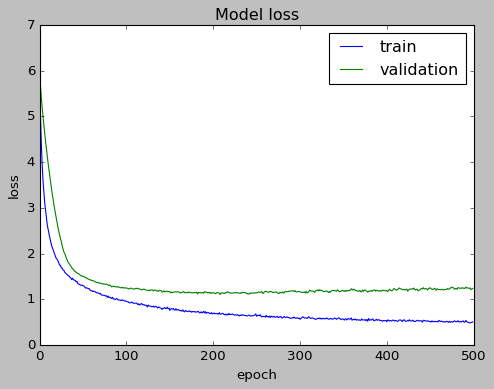

In [217]:
#Visualizing losses
plt.figure(1, figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.style.use(['classic'])

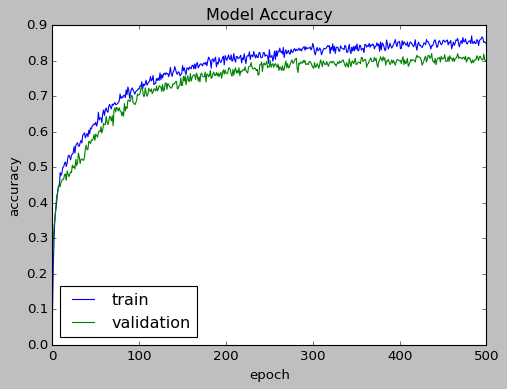

In [218]:
#Visualizing accuracies
plt.figure(2, figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc=3)
plt.style.use(['classic'])

In [225]:
#test 
income = 150000
city = locator.geocode('Moratuwa'+', Sri Lanka')[-1]
district_lat,district_lon = locator.geocode('Colombo'+', Sri Lanka')[-1]

city_lat = abs(city[0] - district_lat)
city_lon = abs(city[1] - district_lon)


encoding = np.array(['Maths',	'Computing','Colombo','Moratuwa']).reshape((-1,1))

test = [income/max_income,city_lat,city_lon,district_lat/max_lat,district_lon/max_lon]
#Encoding the test input same as model input
for i in range(3): 
  encoded = encoders[i].transform(np.array(encoding[i]).reshape((-1,1))).toarray().flatten()
  test.extend(encoded)
test = np.array(test).reshape((1,43))


In [226]:
#predict
res = model.predict(test) 

In [227]:
#select the predicted names from tile name list
unique_values[3][np.argsort(res.flatten())[-1:-5:-1]] 

array(['Computer Science - General Sir John Kotelawala Defence University',
       'Software Engineering - Informatics Institute of Technology Sri Lanka(IIT)',
       'Data Science - General Sir John Kotelawala Defence University',
       'Computer Science - Informatics Institute of Technology Sri Lanka(IIT)'],
      dtype=object)

In [229]:
#Save model
model.save('trained_model.h5') 